# Indian General Elections 2019: Data Analysis And Prediction Using Machine Learning

<img src="https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-us.s3.amazonaws.com%2F5c2322c8-7deb-11e9-81d2-f785092ab560?fit=scale-down&source=next&width=700" width="1000">

## Table Of Contents

1. Introduction
2. Environment Setup
3. Gathering The Data
4. Features
5. Data Preprocessing and Basic Exploratory Data Analysis (EDA)
6. Data Analysis <br>
    6.1 Lok sabha 2019: Election results<br>
    6.2 Party-wise vote share<br>
    6.3 Age distribution of candidates<br>
    6.4 Caste distribution of candidates<br>
    6.5 Criminal records of candidates<br>
    6.6 Key battlegrounds of the election<br>
7. Preparing the data <br>
    7.1 Scaling the data<br>
    7.2 Resampling the data<br>
8. Machine learning model experimentation - classification
9. Evaluating the model - classification<br>
    9.1 Classification report<br>
    9.2 Confusion matrix<br>
    9.3 ROC Curve<br>
10. Conclusion

## 1. Introduction

<p> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/March_2020_Parliament_Lok_sabha.svg/1200px-March_2020_Parliament_Lok_sabha.svg.png", style="float:top", width="300", height="180"> </p>
<br>
<p> The 2019 Indian general election was held in seven phases from 11 April to 19 May 2019 to constitute the 17th Lok Sabha. The votes were counted, and the result was declared on 23 May. About 911 million people were eligible to vote, and voter turnout was over 67 percent – the highest ever and the highest ever participation by women voters.
The Bharatiya Janata Party won 303 seats, further increasing its substantial majority, and the BJP-led National Democratic Alliance (NDA) won 353 seats. The BJP won 37.36% of votes, while the NDA's combined ballot was 45% of the 60.37 crore votes that were polled. The Indian National Congress won just 52 seats, and the Congress-led United Progressive Alliance won 91. Other parties and their alliances won 98 seats. </p>
<br>
<p> In this notebook, I have used data visualization tools such as Matplotlib, Plotly, and Seaborn to visualize how India's people voted during the 2019 elections. I have also experimented with Random Forest Classifier, Support Vector Machine, and K-Nearest Neighbor machine learning models to make predictions. The models' hyperparameters were first tuned manually, and then GridSearchCV was used to find the most optimum results. I have also evaluated the performance metrics of these models and compared them with each other. </p>

## 2. Environment Setup

In [52]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
import time

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from imblearn.over_sampling import SMOTE

# Import for scaling the data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

# Import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)

## 3. Gathering The Data

The data for this project has been collected from Kaggle:
https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

In [5]:
# Loading the dataset
df = pd.read_csv("data/LS_2.0.csv")
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
df.replace({'Not Available': np.nan}, inplace=True)

## 4. Features

- STATE
- CONSTITUENCY
- NAME
- WINNER
- PARTY
- SYMBOL
- GENDER
- CRIMINAL CASES
- AGE
- CATEGORY
- EDUCATION
- ASSETS
- LIABILITIES
- GENERAL VOTES 
- POSTAL VOTES
- TOTAL VOTES
- OVER TOTAL ELECTORS IN CONSTITUENCY
- OVER TOTAL VOTES POLLED IN CONSTITUENCY
- TOTAL ELECTORS

## 5. Data Preprocessing and Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   STATE                                      2263 non-null   object 
 1   CONSTITUENCY                               2263 non-null   object 
 2   NAME                                       2263 non-null   object 
 3   WINNER                                     2263 non-null   int64  
 4   PARTY                                      2263 non-null   object 
 5   SYMBOL                                     2018 non-null   object 
 6   GENDER                                     2018 non-null   object 
 7   CRIMINAL
CASES                            1996 non-null   object 
 8   AGE                                        2018 non-null   float64
 9   CATEGORY                                   2018 non-null   object 
 10  EDUCATION                

In [8]:
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('\n','')

In [9]:
df.describe()

,WINNER,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [10]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df = df[df['PARTY']!= 'NOTA']
df = df.dropna()
df.isna().sum()

STATE                                      0
CONSTITUENCY                               0
NAME                                       0
WINNER                                     0
PARTY                                      0
SYMBOL                                     0
GENDER                                     0
CRIMINALCASES                              0
AGE                                        0
CATEGORY                                   0
EDUCATION                                  0
ASSETS                                     0
LIABILITIES                                0
GENERALVOTES                               0
POSTALVOTES                                0
TOTALVOTES                                 0
OVER TOTAL ELECTORS IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED IN CONSTITUENCY    0
TOTAL ELECTORS                             0
dtype: int64

In [11]:
df.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\r\n ~ 13 Crore+","Rs 2,22,51,891\r\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\r\n ~ 5 Crore+",Rs 0\r\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\r\n ~ 16 Crore+","Rs 26,23,964\r\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\r\n ~ 9 Crore+","Rs 3,25,49,132\r\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\r\n ~ 1 Crore+","Rs 14,00,000\r\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Others,"Rs 7,46,99,690\r\n ~ 7 Crore+","Rs 62,52,577\r\n ~ 62 Lacs+",745810,4024,749834,41.384970,67.005462,1811851


In [12]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINALCASES                               object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [13]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['ASSETS'] = df['ASSETS'].apply((value_cleaner))
df['LIABILITIES'] = df['LIABILITIES'].apply((value_cleaner))

In [14]:
df['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Illiterate                 5
Post Graduate\r\n          1
Name: EDUCATION, dtype: int64

In [15]:
# Removing the \n from 'Post Graduate\n'
df['EDUCATION'].replace(to_replace='Post Graduate\r\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

# 'Literate' = 8th Pass in our society
df['EDUCATION'].replace(to_replace='Literate', value='8th Pass', inplace=True)

# Any education level below 8th pass is illiterate
df['EDUCATION'].replace(to_replace='5th Pass', value='Illiterate', inplace=True)

In [16]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


In [17]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINALCASES                               object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [18]:
df['CRIMINALCASES'] = df['CRIMINALCASES'].astype(int, errors='raise')
df['ASSETS'] = df['ASSETS'].astype(float, errors='raise')
df['LIABILITIES'] = df['LIABILITIES'].astype(float, errors='raise')

In [19]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690


## 6. Data Analysis

### 6.1 State and Constituency by total electors

In [20]:
state_df = df[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
state_fig = px.sunburst(state_df, 
                        path=['STATE','CONSTITUENCY'], 
                        values='TOTAL ELECTORS',
                        color='TOTAL ELECTORS',
                        color_continuous_scale='Oryel')
state_fig.update_layout(title_text='State and Constituency by total electors',
                       font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
state_fig.show()

### 6.2 Lok Sabha 2019 Election Results : Top 20 Political Parties

In [21]:
# Number of seats won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)

# Visualize the party-wise election results
result_fig = px.bar(result_df, 
                    x=result_df['PARTY'][:20], 
                    y=result_df["WINNER"][:20], 
                    color=result_df['WINNER'][:20], 
                    height=500,
                    color_continuous_scale='Oryel')
result_fig.update_layout(title_text='Top 20 Party-wise election results',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
result_fig.show()

Bharatiya Janata Party (BJP) emerged as the single largest party after winning 300 seats. BJP is also the single largest party in terms of total vote share in Lok Sabha Election 2019. Congress secured the second position after winning 52 seats. After the landslide victory of Bharatiya Janata Party in the 17th Lok Sabha election; Narendra Modi is the 15th Prime Minister of India. BJP got the thumping majority in the 17th Lok Sabha election.
Worth to mention that maximum seats in Lok Sabha can be 552; comprises 530 from states, 20 from Union Territories and 2 nominated members. Currently, only 543 members are elected for Lok Sabha from different states and UTs for the 17th Lok Sabha. 

### 6.3 Party-Wise Vote Share

In [22]:
# Create a dataframe with total number of votes won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df.groupby('PARTY')['TOTALVOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTALVOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)

# Sort out the top five parties according to the total number of votes
vote_share_top5 = df.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df['Party New'] = df.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df.groupby('Party New')['TOTALVOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=2))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
vote_count_fig.show()

In [23]:
df['Party New'].value_counts()

Other    918
BJP      420
INC      411
BSP      161
AITC      47
SP        39
Name: Party New, dtype: int64

The Bharatiya Janata Party garnered 38.8% of the votes in the 2019 Lok Sabha elections. This is the highest vote share received by the party nation-wide in any Lok Sabha election since the party was (re)formed in 1980. In contrast, the Congress party failed to improve on its vote share from 2014 and gathered 20.2% of the total votes. The dominant victory of the BJP and its allies — by repeating the 2014 win, and then some — suggests that the era of coalitions (and/or a central government with a relatively weak national party in power) determining the balance of power at Delhi has decisively come to an end.

### 6.4 Age Distribution Of Candidates

In [24]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df, 
                                    x="AGE",
                                    color_discrete_sequence=['indianred'])
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates',
                                   xaxis_title="Distribution",
                                   yaxis_title="Age")
age_distribution_fig.update_layout(font_family="Courier New",
                                   font_color="#351f39",
                                   title_font_family="Courier New",
                                   title_font_color="#351f39")
age_distribution_fig.show()

### 6.5 Caste Distribution Of Candidates

In [25]:
# Create a dataframe containing the caste distribution of winners
winner_caste = df[df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_df = pd.DataFrame(data=winner_caste)
winner_caste_df.reset_index(level=0, inplace=True)
winner_caste_df['Category'] = 'Winner'

# Create a dataframe containing the caste distribution of total number of candidates
total_caste = df.groupby('CATEGORY').size()
total_caste_df = pd.DataFrame(data=total_caste)
total_caste_df.reset_index(level=0, inplace=True)
total_caste_df['Category'] = 'Total'
total_caste_df.rename(columns={0: "WINNER"}, inplace=True)

# Concatenate the two dataframes
winner_caste_df = pd.concat((winner_caste_df, total_caste_df))

# Visualize the results
caste_fig = px.bar(winner_caste_df, 
                   x='CATEGORY', 
                   y='WINNER',
                   color='Category', 
                   barmode='group')
caste_fig.update_layout(font_family="Courier New",
                        font_color="#351f39",
                        title_text='Caste distribution of candidates',
                        title_font_family="Courier New",
                        title_font_color="#351f39",
                        xaxis_title='Caste',
                        yaxis_title='Count')
caste_fig.show()

### 6.6 Top ten party-wise criminal records

In [26]:
# Create a dataframe of criminal records
criminal_df = pd.DataFrame(data=df[df['WINNER'] == 1].groupby('PARTY')['CRIMINALCASES'].sum())
criminal_df.sort_values(by='CRIMINALCASES', ascending=False, inplace=True)
criminal_df.reset_index(level=0, inplace=True)
criminal_df

# Visualize the criminal records
criminal_fig = px.scatter(criminal_df[:10], 
                 x='PARTY', 
                 y='CRIMINALCASES', 
                 size='CRIMINALCASES',
                 color='PARTY',
                 hover_data=['CRIMINALCASES'])

criminal_fig.update_layout(title_text='Top 10 Party-wise criminal records',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Criminal Records")

criminal_fig.show()

### 6.7 Key battlegrounds of the election

**Amethi (Uttar Pradesh):** Known to be a traditional Congress bastion, BJP had fielded Union Minister Smriti Irani against Congress president Rahul Gandhi. The voting day in Amethi in the fifth phase was marked by charges of 'booth-rigging' by Irani and Congress president Rahul Gandhi being absent from the constituency. In 2014, Irani lost to Rahul Gandhi from the same seat with a vote-margin of 1.07 lakh votes or a vote-ratio of about 3:4. This time, her challenge has forced Rahul Gandhi to also seek election from Wayanad.
<img src=https://static.toiimg.com/thumb/msid-68513257,imgsize-212668,width-400,resizemode-4/68513257.jpg>

**Varanasi (Uttar Pradesh):** Given the significance of the seat, mid-polls rumours had emerged that the Congress' General Secretary for Uttar Pradesh East Priyanka Gandhi Vadra could contest the seat. However, the speculations were put to rest as Congress fielded Ajay Rai, hours before PM Modi addressed a massive road-show ahead of his nomination-filing. In the 2014 Parliamentary elections, PM Modi swept the seat by receiving 56.40% of votes and defeated Arvind Kejriwal by a by 3.37 lakh vote margin.
<img src=https://resize4.indiatvnews.com/en/resize/gallery/835_-/2020/11/PTI30-11-2020_000175B.jpg style="width:500px;height:200px;">

<AxesSubplot:title={'center':"Battleground Varanasi: Narendra Modi's Constituency"}, xlabel='NAME'>

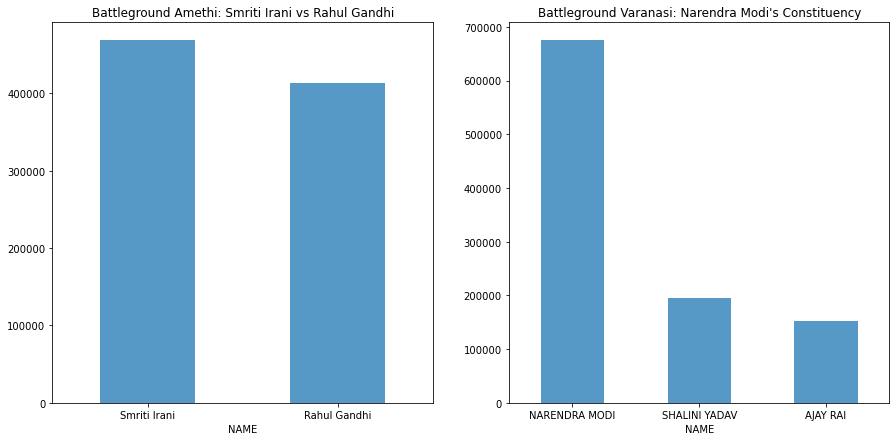

In [27]:
# Battleground Amethi
amethi_df = df[df['CONSTITUENCY'] == 'AMETHI'][['NAME','TOTALVOTES']]

# Battleground Varanasi
varanasi_df = df[df['CONSTITUENCY'] == 'VARANASI'][['NAME','TOTALVOTES']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
amethi_df.plot(kind='bar', ax=axes[0], alpha=0.75, rot=0, legend=False, title='Battleground Amethi: Smriti Irani vs Rahul Gandhi', x='NAME')
varanasi_df.plot(kind='bar', ax=axes[1], alpha=0.75, rot=0, legend=False, title="Battleground Varanasi: Narendra Modi's Constituency", x='NAME')

- This time things were different in Amethi. Smriti Irani defeated Rahul Gandhi by a substantial margin.
- In Varanasi however the picture was similar with Narendra Modi winning the seat by a landslide.

**West Bengal:** West Bengal remained the newsmaker of the 2019 Lok Sabha polls, with violence including crude bombs, lathi charges and repeated political clashes and claims of attacks from candidates became the talking point in the state as polling was held in all seven phases spread across two months in the politically important state. Bengal has 42 Lok Sabha constituencies, of which the Trinamool won 34 in 2014. The Congress managed four and the Left two. The BJP secured only two, despite the Narendra Modi wave in the country that year. The state which was considered to be a bastion for the Left Wing has now become a stronghold for the Trinamool Congress.
<img src=https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2019/05/26/Pictures/mamata-supremo-banerjee-west-bengal-chief-minister_73f1c2d4-7f98-11e9-9a75-14b5d08877bf.jpg>

In [28]:
# Battleground West Bengal
bengal_df = pd.DataFrame(data=df[df['STATE'] == 'West Bengal'])
bengal_df_vote = pd.DataFrame(data=bengal_df.groupby('PARTY')['TOTALVOTES'].sum())
bengal_df_vote.sort_values(by='TOTALVOTES', ascending=False, inplace=True)
bengal_df_vote.reset_index(level=0, inplace=True)
bengal_df_vote['Category'] = bengal_df_vote.apply(sort_party, axis=1)
bengal_vote_count = bengal_df_vote.groupby('Category')['TOTALVOTES'].sum()

vote_share_top5 = bengal_df_vote.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()
# Visualize Party-wise vote share
bengal_fig = go.Figure(go.Pie(labels=bengal_vote_count.index, 
                                  values=bengal_vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=2))))
bengal_fig.update_layout(title_text='West Bengal : Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
bengal_fig.show()

The Trinamool Congress recorded its best-ever performance in 2014 Lok Sabha election in West Bengal as it swept 34 of the 42 seats decimating the Left in its victory march, while the BJP made impressive inroads winning two seats. The BJP left no stone unturned in attempting to make inroads into Mamata Banerjee's bastion while the Trinamool responded by not ceding an inch. This time around BJP swept the 2019 Lok Sabha polls winning 18 seats out of 42 with a vote share of 41.6%. However it failed to dent the consolidated vote share of Mamata Banerjee's TMC.

**How people voted in Bengal?**

<AxesSubplot:title={'center':'West Bengal: Education of winning candidates'}, xlabel='Education Level'>

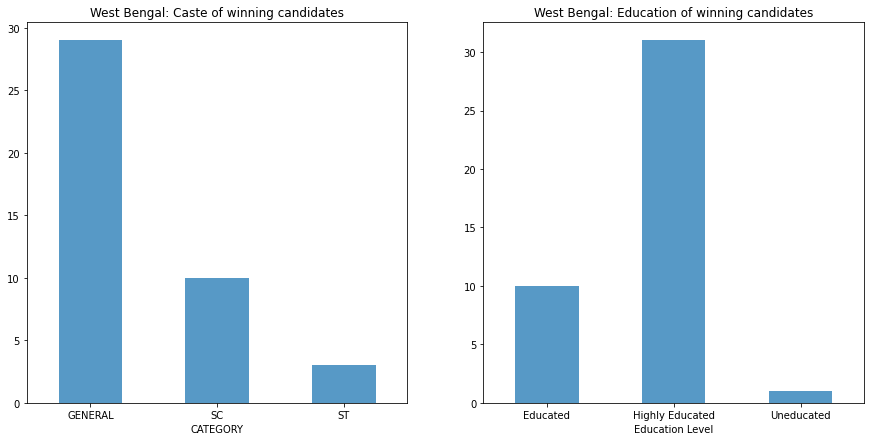

In [29]:
# Create a dataframe containing the caste distribution of winners
winner_caste_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_bengal_df= pd.DataFrame(data=winner_caste_bengal)
winner_caste_bengal_df.reset_index(level=0, inplace=True)

def education(data):
    if data['EDUCATION'] in ['5th Pass', 'Others', 'Illiterate', 'Not Available']:
        return 'Uneducated'
    elif data['EDUCATION'] in ['Graduate', 'Doctorate', 'Post Graduate']:
        return 'Highly Educated'
    else:
        return 'Educated'
    
bengal_df['Education Level'] = bengal_df.apply(education, axis=1)

winner_edu_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('Education Level')['WINNER'].size()
winner_edu_bengal_df= pd.DataFrame(data=winner_edu_bengal)
winner_edu_bengal_df.reset_index(level=0, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
winner_caste_bengal_df.plot(kind='bar', ax=axes[0], alpha=0.75, rot=0, legend=False, title='West Bengal: Caste of winning candidates', x='CATEGORY')
winner_edu_bengal_df.plot(kind='bar', ax=axes[1], alpha=0.75, rot=0, legend=False, title='West Bengal: Education of winning candidates', x='Education Level')

- Most of the winning candidates are from General caste.
- When it comes to education most of the winning candidates are highly educated. The level of education of an candidate is a key factor in West Bengal

**Begusarai (Bihar):** The Begusarai constituency, which is among the most talked about seats in Bihar, recorded a comparatively high turnout of 61.27%, as per the EC. The constituency has been under a microscope as it is witnessing the electoral debut of CPI candidate Kanhaiya Kumar, the controversial former JNUSU president who is pitted against BJP leader and union minister Giriraj Singh. The Mahagathbandhan's nominee is Tanweer Hasan (RJD).

**Bangalore South (Karnataka)**: The saffron bastion will see BJP's Tejasvi Surya take on Congress’ BK Hariprasad. After the untimely death of BJP leader and union minister Ananth Kumar who had held the constituency since 1996, BJP has fielded a young face in Tejasvi Surya. The late Ananth Kumar had beaten Infosys co-founder Nandan Nilekani, then a Congress candidate, in 2014.

**Wayanad (Kerala):** Congress chief Rahul Gandhi contesting from this constituency apart from Congress' bastion in Amethi has made the relatively new seat becoming a national talking point. Against him are PP Suneer of CPI(M) and Thushar Vellappally of Bharath Dharma Jana Sena (an ally of BJP). Interestingly, Congress chief will be fighting with three namesakes: two Independent candidates, K.E. Rahul Gandhi and K.M. Shivprasad Gandhi, and K. Raghul Gandhi of the Agila India Makkal Kazhagam party.

**Bhopal (Madhya Pradesh):** A BJP bastion, this constituency has taken centrestage ever since the BJP fielded Malegaon blast-accused Sadhvi Pragya from the seat against Congress veteran Digvijaya Singh. Singh has been CM of Madhya Pradesh and is contesting an election after a gap of almost 19 years, the last being the assembly election he contested in 2003. He was nominated to the Rajya Sabha in 2014 from Madhya Pradesh. The BJP however has consistently been winning the seat of Bhopal since 1989. BJP's Alok Sanjar is the sitting MP from the Bhopal Lok Sabha seat. What makes the contest especially interesting, however, is the fact that Digvijaya Singh was one of the most significant proposers of 'Saffron terror/Hindu terror' which cited the Malegaon blasts among others.
<img src=https://spiderimg.amarujala.com/assets/images/2019/04/17/750x506/sadhvi-pragya-vs-digvijay_1555489861.jpeg style="width:700px;height:300px;">

<AxesSubplot:title={'center':'Battleground Bhopal'}, xlabel='NAME'>

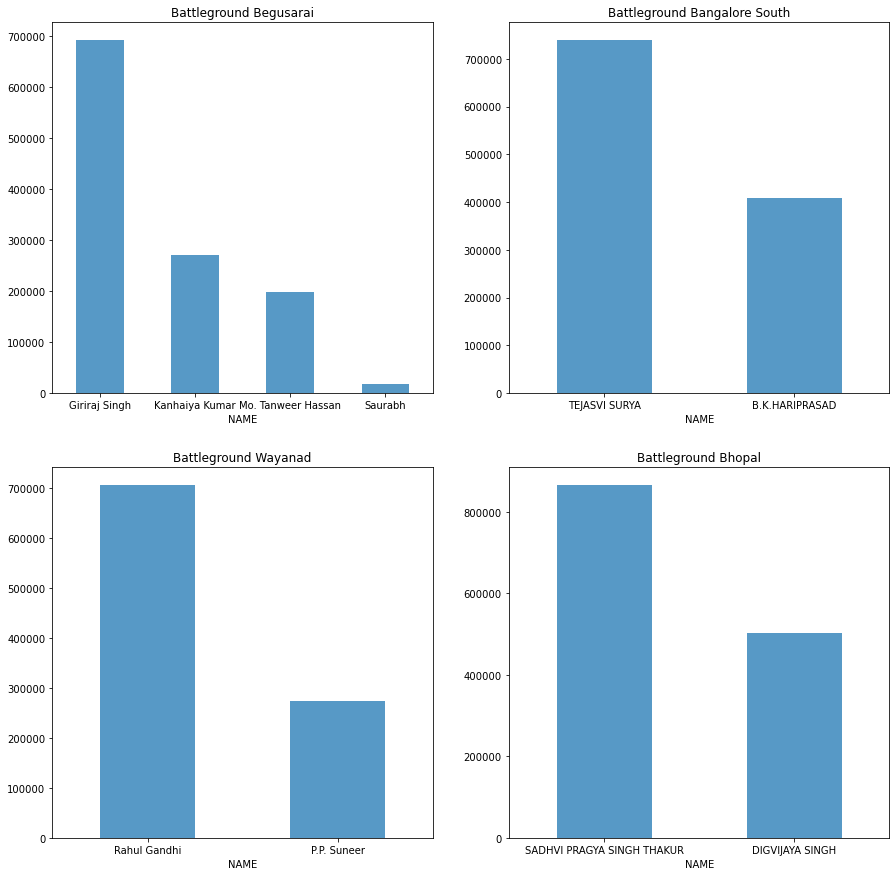

In [30]:
begusarai_df = df[df['CONSTITUENCY'] == 'BEGUSARAI'][['NAME','TOTALVOTES']]
bangalore_df = df[df['CONSTITUENCY'] == 'BANGALORE SOUTH'][['NAME','TOTALVOTES']]
wayanad_df = df[df['CONSTITUENCY'] == 'WAYANAD'][['NAME','TOTALVOTES']]
bhopal_df = df[df['CONSTITUENCY'] == 'BHOPAL'][['NAME','TOTALVOTES']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
begusarai_df.plot(kind='bar', ax=axes[0,0], alpha=0.75, rot=0, legend=False, title='Battleground Begusarai', x='NAME')
bangalore_df.plot(kind='bar', ax=axes[0,1], alpha=0.75, rot=0, legend=False, title="Battleground Bangalore South", x='NAME')
wayanad_df.plot(kind='bar', ax=axes[1,0], alpha=0.75, rot=0, legend=False, title='Battleground Wayanad', x='NAME')
bhopal_df.plot(kind='bar', ax=axes[1,1], alpha=0.75, rot=0, legend=False, title="Battleground Bhopal", x='NAME')


## 7. Preparing the data

### 7.1 Scaling the data

In [31]:
# This is the dataset which will be used for fitting Machine Learning models
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,Party New
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,BJP
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790,Other
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790,INC
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,BJP
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,BSP


In [32]:
# Labeling parties with less than 10 candidates as others
less_candidates = []
for i, j in df['PARTY'].value_counts().items():
    if j <= 10:
        less_candidates.append(i)
len(less_candidates)

def small_party(data):
    if data in less_candidates:
        return 'Other'
    return data
df['PARTY'] = df['PARTY'].apply(small_party)
df['PARTY'].value_counts()

BJP       420
INC       411
Other     247
IND       193
BSP       161
CPI(M)    100
AITC       47
VBA        47
SP         39
MNM        35
NTK        34
SHS        26
AAP        25
YSRCP      25
TDP        25
DMK        23
NCP        21
BJD        21
AIADMK     21
RJD        21
JnP        19
JD(U)      18
TRS        17
Name: PARTY, dtype: int64

In [33]:
X = df.drop(['NAME', 'SYMBOL', 'WINNER', 'GENERALVOTES', 'POSTALVOTES', 'TOTALVOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY', 
             'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'Party New', 'CONSTITUENCY'], axis=1)
y = df['WINNER']
X.head()

,STATE,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS
0,Telangana,BJP,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,1489790
1,Telangana,TRS,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,1489790
2,Telangana,INC,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,1489790
4,Uttar Pradesh,BJP,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,1937690
5,Uttar Pradesh,BSP,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,1937690


In [34]:
# Creating training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
categorical = []
numerical = []

# Converting Strings to Category
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype("category")
        categorical.append(label)

    if pd.api.types.is_numeric_dtype(content):
        numerical.append(label)

In [36]:
# Initializing the StandardScaler()
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

# Encoding the categorical columns
for cat in categorical:
    label_fit = encoder.fit(np.array(X[cat]).reshape(-1, 1))
    X_train[cat] = label_fit.transform(np.array(X_train[cat]).reshape(-1, 1))
    X_test[cat] = label_fit.transform(np.array(X_test[cat]).reshape(-1, 1))
    
# Scaling the dataset
scaler_fit = scaler.fit(X[numerical])
X_train[numerical] = scaler_fit.transform(X_train[numerical])
X_test[numerical] = scaler_fit.transform(X_test[numerical])

In [42]:
# Encoding the target
target_enc = LabelEncoder().fit(y_train)
y_train = target_enc.transform(y_train)
y_test = target_enc.transform(y_test)

### 7.2 Upsampling the dataset

In [43]:
Counter(y_train)

Counter({1: 382, 0: 1015})

In [44]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({1: 1015, 0: 1015})


## 8. Machine learning model experimentation

In [56]:
np.random.seed(42)

# Create a dictionary of the models to experiment
models = {
          "Random Forest" : RandomForestClassifier(n_jobs=-1),
          "Support Vector Machines" : SVC(),
          "K-Nearest Neighbors" : KNeighborsClassifier(),
          "Logistic Regression"  : LogisticRegression(),
          "XG Boosting" : xgb.XGBClassifier(n_jobs=-1),
          "Cat Boosting": CatBoostClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier(),
          "ADA Boosting" : AdaBoostClassifier(),
          "LG Boosting" : lgb.LGBMClassifier(),
          "Decision Trees" : DecisionTreeClassifier()
         }

# Create a function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    train_model_scores_acc = {}
    train_model_scores_pre = {}
    train_model_scores_rec = {}
    train_model_scores_f1 = {}
    
    test_model_scores_acc = {}
    test_model_scores_pre = {}
    test_model_scores_rec = {}
    test_model_scores_f1 = {}
    
    train_model_timing = {}
    
    for name, model in models.items():
        start = time.time()
        train_model_scores_acc[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')) * 100
        train_model_scores_pre[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='precision')) * 100
        train_model_scores_rec[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='recall')) * 100
        train_model_scores_f1[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='f1')) * 100
        stop = time.time()
        timing = stop - start
        train_model_timing[name] = timing
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        test_model_scores_acc[name] = accuracy_score(y_test, pred) * 100
        test_model_scores_pre[name] = precision_score(y_test, pred) * 100
        test_model_scores_rec[name] = recall_score(y_test, pred) * 100
        test_model_scores_f1[name] = f1_score(y_test, pred) * 100
        
    # Create dictionary for oil scores
    scores = {'Training Accuracy': train_model_scores_acc,
              'Training Precision': train_model_scores_pre,
              'Training Recall': train_model_scores_rec,
              'Training F1': train_model_scores_f1,
              'Test Accuracy':  test_model_scores_acc,
              'Test Precision': test_model_scores_pre,
              'Test Recall': test_model_scores_rec,
              'Test F1': test_model_scores_f1,
              '10-Fold CV Timing (seconds)': train_model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('Test Accuracy', ascending=False, inplace=True)
    return scores_df

In [57]:
score_df = fit_and_score(models, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:13:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



Learning rate set to 0.013939
0:	learn: 0.6843460	total: 2.66ms	remaining: 2.66s
1:	learn: 0.6766777	total: 5.2ms	remaining: 2.59s
2:	learn: 0.6685430	total: 7.62ms	remaining: 2.53s
3:	learn: 0.6615582	total: 10.1ms	remaining: 2.52s
4:	learn: 0.6535489	total: 12.6ms	remaining: 2.5s
5:	learn: 0.6464548	total: 15.1ms	remaining: 2.51s
6:	learn: 0.6406101	total: 17.7ms	remaining: 2.5s
7:	learn: 0.6329600	total: 20.2ms	remaining: 2.5s
8:	learn: 0.6272461	total: 22.6ms	remaining: 2.49s
9:	learn: 0.6211074	total: 25.2ms	remaining: 2.49s
10:	learn: 0.6152512	total: 27.8ms	remaining: 2.5s
11:	learn: 0.6110427	total: 30.4ms	remaining: 2.5s
12:	learn: 0.6045401	total: 33.2ms	remaining: 2.52s
13:	learn: 0.5991831	total: 35.7ms	remaining: 2.52s
14:	learn: 0.5943916	total: 38.2ms	remaining: 2.5s
15:	learn: 0.5893871	total: 40.7ms	remaining: 2.5s
16:	learn: 0.5844078	total: 43.2ms	remaining: 2.5s
17:	learn: 0.5801181	total: 45.7ms	remaining: 2.49s
18:	learn: 0.5750667	total: 48.2ms	remaining: 2.49s
1

214:	learn: 0.3317326	total: 531ms	remaining: 1.94s
215:	learn: 0.3313484	total: 534ms	remaining: 1.94s
216:	learn: 0.3307360	total: 536ms	remaining: 1.94s
217:	learn: 0.3303912	total: 539ms	remaining: 1.93s
218:	learn: 0.3299703	total: 541ms	remaining: 1.93s
219:	learn: 0.3293780	total: 544ms	remaining: 1.93s
220:	learn: 0.3289209	total: 546ms	remaining: 1.93s
221:	learn: 0.3285150	total: 549ms	remaining: 1.92s
222:	learn: 0.3280182	total: 552ms	remaining: 1.92s
223:	learn: 0.3275752	total: 554ms	remaining: 1.92s
224:	learn: 0.3264692	total: 557ms	remaining: 1.92s
225:	learn: 0.3258928	total: 559ms	remaining: 1.92s
226:	learn: 0.3255919	total: 562ms	remaining: 1.91s
227:	learn: 0.3253188	total: 564ms	remaining: 1.91s
228:	learn: 0.3250379	total: 567ms	remaining: 1.91s
229:	learn: 0.3244324	total: 569ms	remaining: 1.9s
230:	learn: 0.3242224	total: 571ms	remaining: 1.9s
231:	learn: 0.3239493	total: 574ms	remaining: 1.9s
232:	learn: 0.3234369	total: 576ms	remaining: 1.9s
233:	learn: 0.32

433:	learn: 0.2572329	total: 1.07s	remaining: 1.4s
434:	learn: 0.2569117	total: 1.07s	remaining: 1.39s
435:	learn: 0.2565988	total: 1.08s	remaining: 1.39s
436:	learn: 0.2564220	total: 1.08s	remaining: 1.39s
437:	learn: 0.2562539	total: 1.08s	remaining: 1.39s
438:	learn: 0.2560420	total: 1.08s	remaining: 1.38s
439:	learn: 0.2558494	total: 1.08s	remaining: 1.38s
440:	learn: 0.2556022	total: 1.09s	remaining: 1.38s
441:	learn: 0.2554239	total: 1.09s	remaining: 1.38s
442:	learn: 0.2552275	total: 1.09s	remaining: 1.37s
443:	learn: 0.2548638	total: 1.09s	remaining: 1.37s
444:	learn: 0.2543235	total: 1.1s	remaining: 1.37s
445:	learn: 0.2541003	total: 1.1s	remaining: 1.37s
446:	learn: 0.2538978	total: 1.1s	remaining: 1.36s
447:	learn: 0.2536504	total: 1.1s	remaining: 1.36s
448:	learn: 0.2534390	total: 1.11s	remaining: 1.36s
449:	learn: 0.2532382	total: 1.11s	remaining: 1.36s
450:	learn: 0.2529770	total: 1.11s	remaining: 1.35s
451:	learn: 0.2528655	total: 1.11s	remaining: 1.35s
452:	learn: 0.252

654:	learn: 0.2083492	total: 1.61s	remaining: 849ms
655:	learn: 0.2082020	total: 1.61s	remaining: 846ms
656:	learn: 0.2081107	total: 1.62s	remaining: 844ms
657:	learn: 0.2078970	total: 1.62s	remaining: 841ms
658:	learn: 0.2076426	total: 1.62s	remaining: 839ms
659:	learn: 0.2074981	total: 1.62s	remaining: 836ms
660:	learn: 0.2073421	total: 1.63s	remaining: 834ms
661:	learn: 0.2071237	total: 1.63s	remaining: 831ms
662:	learn: 0.2070050	total: 1.63s	remaining: 829ms
663:	learn: 0.2069095	total: 1.63s	remaining: 827ms
664:	learn: 0.2066045	total: 1.64s	remaining: 824ms
665:	learn: 0.2064728	total: 1.64s	remaining: 822ms
666:	learn: 0.2062553	total: 1.64s	remaining: 819ms
667:	learn: 0.2060982	total: 1.64s	remaining: 817ms
668:	learn: 0.2058463	total: 1.65s	remaining: 814ms
669:	learn: 0.2056910	total: 1.65s	remaining: 812ms
670:	learn: 0.2055329	total: 1.65s	remaining: 809ms
671:	learn: 0.2053872	total: 1.65s	remaining: 807ms
672:	learn: 0.2052274	total: 1.66s	remaining: 804ms
673:	learn: 

873:	learn: 0.1719439	total: 2.15s	remaining: 310ms
874:	learn: 0.1718178	total: 2.15s	remaining: 308ms
875:	learn: 0.1717049	total: 2.16s	remaining: 305ms
876:	learn: 0.1715817	total: 2.16s	remaining: 303ms
877:	learn: 0.1714646	total: 2.16s	remaining: 300ms
878:	learn: 0.1713135	total: 2.16s	remaining: 298ms
879:	learn: 0.1711758	total: 2.17s	remaining: 295ms
880:	learn: 0.1710766	total: 2.17s	remaining: 293ms
881:	learn: 0.1709267	total: 2.17s	remaining: 291ms
882:	learn: 0.1707984	total: 2.17s	remaining: 288ms
883:	learn: 0.1705574	total: 2.18s	remaining: 286ms
884:	learn: 0.1704465	total: 2.18s	remaining: 283ms
885:	learn: 0.1702174	total: 2.18s	remaining: 281ms
886:	learn: 0.1700064	total: 2.18s	remaining: 278ms
887:	learn: 0.1697990	total: 2.19s	remaining: 276ms
888:	learn: 0.1695135	total: 2.19s	remaining: 273ms
889:	learn: 0.1694012	total: 2.19s	remaining: 271ms
890:	learn: 0.1693296	total: 2.19s	remaining: 268ms
891:	learn: 0.1690869	total: 2.2s	remaining: 266ms
892:	learn: 0

In [58]:
score_df

,Model,Training Accuracy,Training Precision,Training Recall,Training F1,Test Accuracy,Test Precision,Test Recall,Test F1,10-Fold CV Timing (seconds)
4,XG Boosting,87.832512,87.787365,88.026597,87.500746,86.811352,75.657895,73.248408,74.433657,3.341062
5,Cat Boosting,88.374384,88.710455,88.115900,88.106941,86.644407,74.522293,74.522293,74.522293,43.529546
8,LG Boosting,88.817734,88.770552,89.006018,88.565337,86.477462,74.050633,74.522293,74.285714,3.986949
6,Gradient Boosting,85.517241,86.593456,84.175888,85.083439,86.310518,72.455090,77.070064,74.691358,1.771262
0,Random Forest,87.783251,88.038917,87.819841,87.554676,85.141903,73.287671,68.152866,70.627063,2.202073
2,K-Nearest Neighbors,84.876847,81.543197,90.353329,85.633702,83.472454,64.795918,80.891720,71.954674,0.155551
7,ADA Boosting,82.660099,84.535804,79.846632,81.815438,82.470785,65.853659,68.789809,67.289720,0.866682
9,Decision Trees,84.236453,83.157125,84.949524,83.529285,80.467446,61.764706,66.878981,64.220183,0.191487
1,Support Vector Machines,66.650246,66.535159,66.898660,66.665603,70.283806,45.914397,75.159236,57.004831,1.264616
3,Logistic Regression,64.039409,62.804008,68.868181,65.654822,62.270451,37.894737,68.789809,48.868778,0.278256


## 9. Evaluation

In [59]:
# Fitting the final model
final_model = xgb.XGBClassifier(n_jobs=-1)
final_model.fit(X_train, y_train)

# Making predictions
pred = final_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:15:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

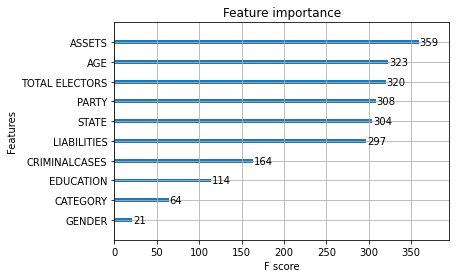

In [61]:
xgb.plot_importance(final_model)

### 9.1 Classification report

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       442
           1       0.76      0.73      0.74       157

    accuracy                           0.87       599
   macro avg       0.83      0.82      0.83       599
weighted avg       0.87      0.87      0.87       599



### 9.2 Confusion matrix

<AxesSubplot:>

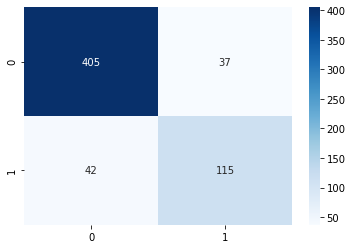

In [63]:
sns.heatmap(confusion_matrix(y_test, pred), cmap= "Blues", annot=True, fmt='')

### 9.3 ROC curve

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



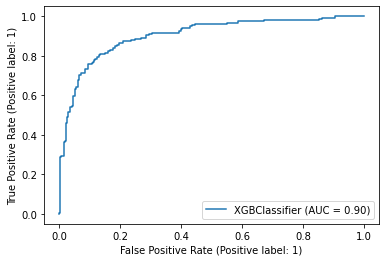

In [64]:
plot_roc_curve(final_model, X_test, y_test)

## 10. Conclusion

**Final Results**

- _Accuracy_ : 87%
- _Precision_ : 87%
- _Recall_ : 87%
- _F1 Score_ : 87%
- _AUC_ : 0.90